In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Presentación de resultados
En este notebook se presentarán los resultados que se obtuvieron de los diferentes experimentos

In [2]:
validations = pd.read_csv('utils/max_scoresv2.csv')

### Resultados del experimento 6 (Meses individuales)

In [3]:
ideal_score = validations.loc[validations['fecha'] == '2016-05-28', 'clean_max_score'].values

In [4]:
exp6_rf_purch = pd.read_csv('scripts/results/final/experiment6_RF_PURCHASERS.csv')
exp6_rf_orig = pd.read_csv('scripts/results/final/experiment6_RF_ORIGINAL.csv')
exp6_dt_purch = pd.read_csv('scripts/results/final/experiment6_DT_PURCHASERS.csv')
exp6_dt_orig = pd.read_csv('scripts/results/final/experiment6_DT_ORIGINAL.csv')

dates = exp6_dt_orig.loc[:, 'date'].values

score_exp6_dt_orig = exp6_dt_orig.loc[:, 'score'].values
score_exp6_rf_orig = exp6_rf_orig.loc[:, 'score'].values
score_exp6_dt_purch = np.insert(exp6_dt_purch.loc[:, 'score'].values, 0, None)
score_exp6_rf_purch = np.insert(exp6_rf_purch.loc[:, 'score'].values, 0, None)

In [5]:
exp6_rf_purchold = pd.read_csv('scripts/results/old/experiment6_purcharsers.csv')
exp6_dt_purchold = pd.read_csv('scripts/results/old/experiment6_DT_purcharsers.csv')
score_exp6_rf_purchold = np.insert(exp6_rf_purchold.loc[:, 'score'].values, 0, None)
score_exp6_dt_purchold = np.insert(exp6_dt_purchold.loc[:, 'score'].values, 0, None)

Para un mejor entendimiento los algoritmos tendrán la siguiente representación:
* DecisionTreeClassifier será DT
* RandomForestClassifier será RF

Los datasets tendrán la siguiente:
* Dataset con datos iniciales - ALL
* Dataset con sólo los compradores - PURCHASERS

In [6]:
scores_exp6 = [score_exp6_dt_orig, score_exp6_rf_orig, score_exp6_dt_purch, score_exp6_rf_purch, score_exp6_dt_purchold,
               score_exp6_rf_purchold]

In [7]:
series_exp6 = np.array(['DT - ALL', 'RF - ALL', 'DT - PURCHASERS', 'RF - PURCHASERS', 'DT - PURCH OLD', 'RF - PURCH OLD'])

In [8]:
score_exp6_rf_orig

array([ 0.01431565,  0.01434419,  0.01440868,  0.01441099,  0.01437199,
        0.01458249,  0.0146406 ,  0.01451165,  0.01459682,  0.01468715,
        0.01493371,  0.01531449,  0.01506127,  0.01567057,  0.01597777,
        0.01340286])

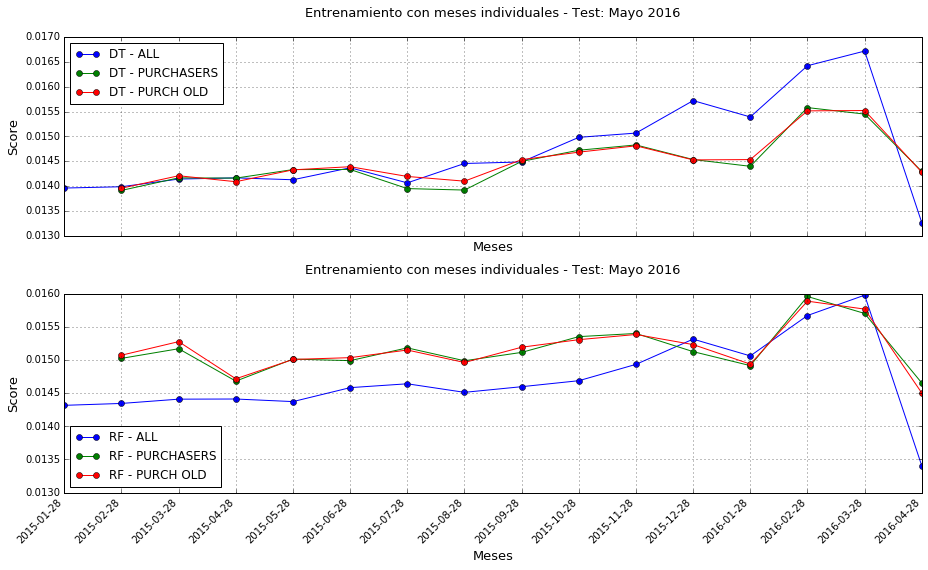

In [9]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(13, 8))
for j, ax in enumerate(axes):
    for i in range(j ,len(scores_exp6), 2):
        ax.plot(scores_exp6[i], '-o')
    ax.legend(series_exp6[[k for k in range(j ,len(scores_exp6), 2)]], loc=0)
    ax.set_xticks(range(len(dates)))
    ax.set_xticklabels(dates, rotation=45, ha='right')
    ax.set_title('Entrenamiento con meses individuales - Test: Mayo 2016\n', size=13)
    ax.set_ylabel('Score', size=13)
    ax.set_xlabel('Meses', size=13)
    ax.grid()
plt.tight_layout()

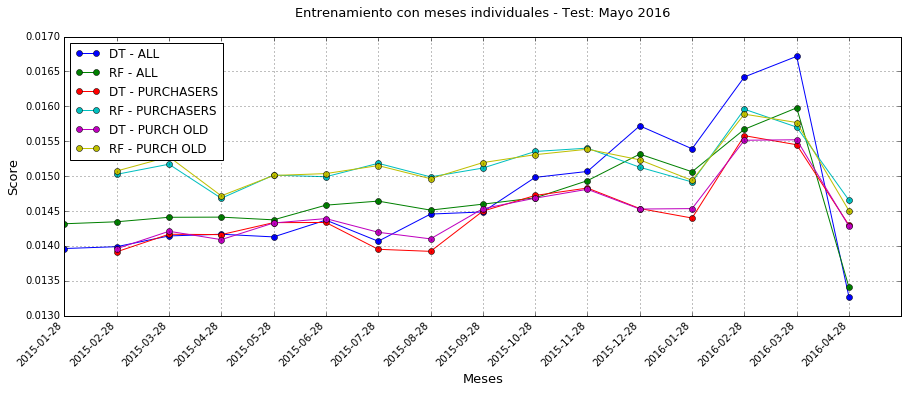

In [10]:
plt.figure(figsize=(15, 5))
for i in scores_exp6:
    plt.plot(i, '-o')
plt.legend(series_exp6, loc=0)
plt.xticks(range(len(dates)), dates, rotation=45, ha='right')
plt.title('Entrenamiento con meses individuales - Test: Mayo 2016\n', size=13)
plt.ylabel('Score', size=13)
plt.xlabel('Meses', size=13)
plt.grid()

In [11]:
for i, score in enumerate(scores_exp6):
    ind_max_score = score.argsort()[-1] if score.argsort()[-1] else score.argsort()[-2]
    max_score = score[ind_max_score]
    perc = max_score*100/ideal_score
    print("{}:".format(series_exp6[i]))
    print("El máximo score es {:.6f} ({}) - representa un {:.3f}% del score ideal".format(max_score,
                                                                                                  dates[ind_max_score],
                                                                                                  perc[0]))
    mean = score[1:].mean() if score.mean() else score.mean()
    print("La media de score es {:.5f} - representa un {:.3f}% del score ideal".format(mean, mean*100/ideal_score[0]))
    print('\n')

DT - ALL:
El máximo score es 0.016716 (2016-03-28) - representa un 58.269% del score ideal
La media de score es 0.01476 - representa un 51.439% del score ideal


RF - ALL:
El máximo score es 0.015978 (2016-03-28) - representa un 55.695% del score ideal
La media de score es 0.01473 - representa un 51.338% del score ideal


DT - PURCHASERS:
El máximo score es 0.015579 (2016-02-28) - representa un 54.305% del score ideal
La media de score es 0.01447 - representa un 50.445% del score ideal


RF - PURCHASERS:
El máximo score es 0.015958 (2016-02-28) - representa un 55.626% del score ideal
La media de score es 0.01515 - representa un 52.814% del score ideal


DT - PURCH OLD:
El máximo score es 0.015520 (2016-03-28) - representa un 54.100% del score ideal
La media de score es 0.01451 - representa un 50.582% del score ideal


RF - PURCH OLD:
El máximo score es 0.015887 (2016-02-28) - representa un 55.380% del score ideal
La media de score es 0.01516 - representa un 52.851% del score ideal




### Resultados del experimento 7 (Meses acumulados)

In [12]:
exp7_rf_purch = pd.read_csv('scripts/results/final/experiment7_RF_PURCHASERS.csv')
exp7_rf_orig = pd.read_csv('scripts/results/final/experiment7_RF_ORIGINAL.csv')
exp7_dt_purch = pd.read_csv('scripts/results/final/experiment7_DT_PURCHASERS.csv')
exp7_dt_orig = pd.read_csv('scripts/results/final/experiment7_DT_ORIGINAL.csv')

dates = exp7_dt_orig.loc[:, 'date_end'].values

score_exp7_dt_orig = exp7_dt_orig.loc[:, 'score'].values
score_exp7_rf_orig = exp7_rf_orig.loc[:, 'score'].values
score_exp7_dt_purch = np.insert(exp7_dt_purch.loc[:, 'score'].values, 0, None)
score_exp7_rf_purch = np.insert(exp7_rf_purch.loc[:, 'score'].values, 0, None)

In [13]:
exp7_purch_rfold = pd.read_csv('scripts/results/old/experiment7_purcharsers.csv')
score_exp7_rfold = np.insert(exp7_purch_rfold.loc[:, 'score'].values, 0, None)

exp7_purch_dtold = pd.read_csv('scripts/results/old/experiment7_DT_purcharsers.csv')
score_exp7_dtold = np.insert(exp7_purch_dtold.loc[:, 'score'].values, 0, None)

Para un mejor entendimiento los algoritmos tendrán la siguiente representación:
* DecisionTreeClassifier será DT
* RandomForestClassifier será RF

Los datasets tendrán la siguiente:
* Dataset con datos iniciales - ALL
* Dataset con sólo los compradores - PURCHASERS

In [14]:
scores_exp7 = [score_exp7_dt_orig, score_exp7_rf_orig, score_exp7_dt_purch, score_exp7_rf_purch, score_exp7_dtold,
               score_exp7_rfold]

In [15]:
series_exp7 = np.array(['DT - ALL', 'RF - ALL', 'DT - PURCHASERS', 'RF - PURCHASERS', 'DT - PURCH OLD', 'RF - PURCH - OLD'])

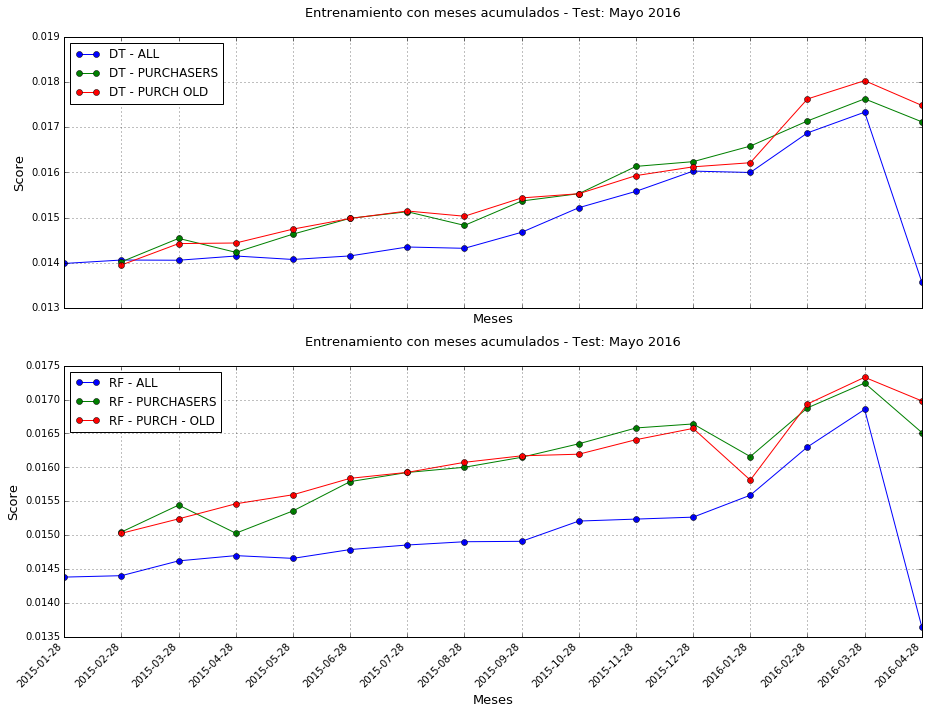

In [16]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(13, 10))
for j, ax in enumerate(axes):
    for i in range(j ,len(scores_exp7), 2):
        ax.plot(scores_exp7[i], '-o')
    ax.legend(series_exp7[[k for k in range(j ,len(scores_exp7), 2)]], loc=0)
    ax.set_xticks(range(len(dates)))
    ax.set_xticklabels(dates, rotation=45, ha='right')
    ax.set_title('Entrenamiento con meses acumulados - Test: Mayo 2016\n', size=13)
    ax.set_ylabel('Score', size=13)
    ax.set_xlabel('Meses', size=13)
    ax.grid()
plt.tight_layout()

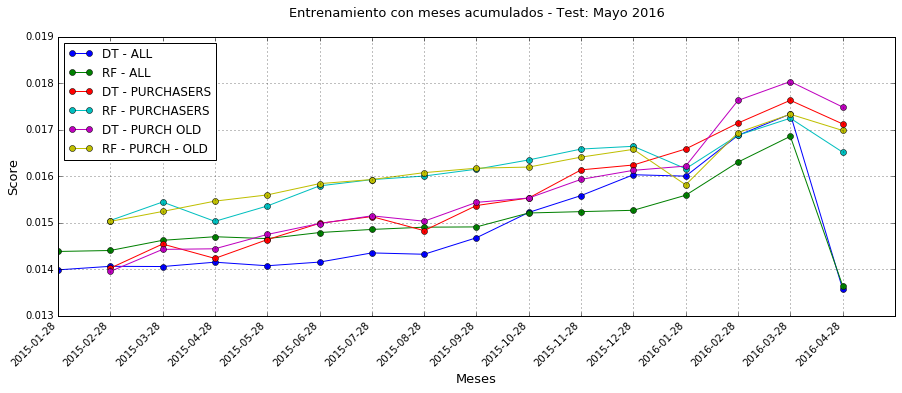

In [17]:
plt.figure(figsize=(15, 5))
for i in scores_exp7:
    plt.plot(i, '-o')
plt.legend(series_exp7, loc=0)
plt.xticks(range(len(dates)), dates, rotation=45, ha='right')
plt.title('Entrenamiento con meses acumulados - Test: Mayo 2016\n', size=13)
plt.ylabel('Score', size=13)
plt.xlabel('Meses', size=13)
plt.grid()

In [18]:
for i, score in enumerate(scores_exp7):
    ind_max_score = score.argsort()[-1] if score.argsort()[-1] else score.argsort()[-2]
    max_score = score[ind_max_score]
    perc = max_score*100/ideal_score
    print("{}:".format(series_exp7[i]))
    print("El máximo score es {:.6f} ({}) - representa un {:.3f}% del score ideal".format(max_score,
                                                                                          dates[ind_max_score],
                                                                                          perc[0]))
    mean = score[1:].mean() if score.mean() else score.mean()
    print("La media de score es {:.5f} - representa un {:.3f}% del score ideal".format(mean, mean*100/ideal_score[0]))
    print('\n')

DT - ALL:
El máximo score es 0.017334 (2016-03-28) - representa un 60.422% del score ideal
La media de score es 0.01496 - representa un 52.152% del score ideal


RF - ALL:
El máximo score es 0.016854 (2016-03-28) - representa un 58.750% del score ideal
La media de score es 0.01506 - representa un 52.495% del score ideal


DT - PURCHASERS:
El máximo score es 0.017629 (2016-03-28) - representa un 61.450% del score ideal
La media de score es 0.01561 - representa un 54.399% del score ideal


RF - PURCHASERS:
El máximo score es 0.017244 (2016-03-28) - representa un 60.108% del score ideal
La media de score es 0.01607 - representa un 56.024% del score ideal


DT - PURCH OLD:
El máximo score es 0.018032 (2016-03-28) - representa un 62.856% del score ideal
La media de score es 0.01567 - representa un 54.627% del score ideal


RF - PURCH - OLD:
El máximo score es 0.017329 (2016-03-28) - representa un 60.405% del score ideal
La media de score es 0.01610 - representa un 56.132% del score ideal




## Resultados de experimentos finales
En esta sección se presentarán los resultados que se hicieron con **cuatro configuraciones** de experimentos que fueron existosos hasta el momento.

Los meses de test de estos experimentos son **Enero 2016, Febrero 2016, Marzo 2016, Abril 2016 y Mayo 2016**

In [19]:
dates = validations.loc[:, ['fecha']].values[-5:].reshape((5))

In [20]:
dates

array(['2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28'], dtype=object)

In [21]:
ideal_scores = validations.loc[validations['fecha'].isin(dates), 'clean_max_score'].values

### 1. Entrenamiento con el mes inmediatamente anterior
La configuración de este experimento es:
* **DATASET:** Completo
* **TRAIN:** El mes previo al de test
* **ALGORITMO:** RandomForest

In [22]:
prev_month_purch = pd.read_csv('scripts/results/PREV_MONTH_RF_PURCHASERS.csv')
score_prev_month_purch = prev_month_purch.loc[:, 'score'].values

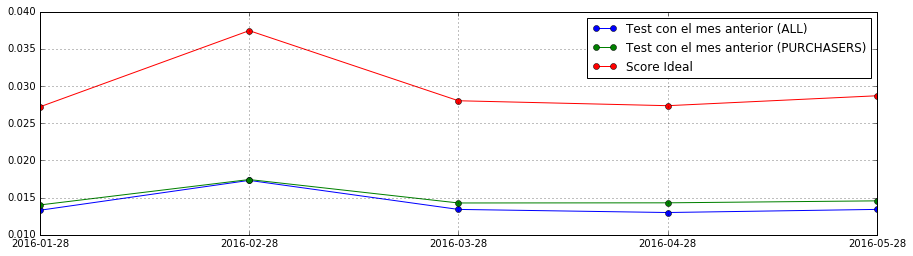

In [23]:
prev_month = pd.read_csv('scripts/results/first_try/PREV_MONTH_RF_ORIGINAL.csv')

score_prev_month = prev_month.loc[:, 'score'].values

plt.figure(figsize=(15, 4))
plt.plot(score_prev_month, '-o', score_prev_month_purch, '-o',ideal_scores, '-o')
plt.xticks(range(len(dates)), dates)
plt.legend(['Test con el mes anterior (ALL)', 'Test con el mes anterior (PURCHASERS)','Score Ideal'], loc=0)
plt.grid()

In [24]:
for i, score in enumerate(score_prev_month):
    ideal = ideal_scores[i]
    date = dates[i]
    print("{:.5f} score para el mes {} que representa un {:.3f}% del score ideal".format(score, date, score*100/ideal))

0.01330 score para el mes 2016-01-28 que representa un 48.900% del score ideal
0.01732 score para el mes 2016-02-28 que representa un 46.247% del score ideal
0.01341 score para el mes 2016-03-28 que representa un 47.869% del score ideal
0.01299 score para el mes 2016-04-28 que representa un 47.504% del score ideal
0.01341 score para el mes 2016-05-28 que representa un 46.761% del score ideal


In [25]:
for i, score in enumerate(score_prev_month_purch):
    ideal = ideal_scores[i]
    date = dates[i]
    print("{:.5f} score para el mes {} que representa un {:.3f}% del score ideal".format(score, date, score*100/ideal))

0.01401 score para el mes 2016-01-28 que representa un 51.513% del score ideal
0.01743 score para el mes 2016-02-28 que representa un 46.546% del score ideal
0.01428 score para el mes 2016-03-28 que representa un 50.963% del score ideal
0.01430 score para el mes 2016-04-28 que representa un 52.271% del score ideal
0.01456 score para el mes 2016-05-28 que representa un 50.764% del score ideal


### 2. Entrenamiento con pesos para los productos
La configuración de este experimento es:
* **DATASET:** Completo
* **TRAIN:** El mes previo al de test
* **ALGORITMO:** RandomForest
* **PESOS:** Si el producto se compraba en el mes anterior se le pone un peso de 0.6 a 1 y 0.4 a 0, de lo contrario se cambiaban los pesos

In [26]:
weight_v1_purch = pd.read_csv('scripts/results/WEIGHT_06_04_RF_PURCHASERS.csv')
score_weight_v1_purch = weight_v1_purch.loc[:, 'score'].values

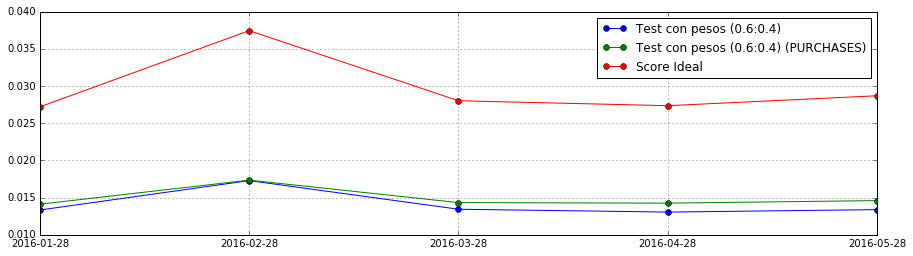

In [27]:
weight_v1 = pd.read_csv('scripts/results/first_try/WEIGHT_06_04_RF_ORIGINAL.csv')
score_weight_v1 = weight_v1.loc[:, 'score'].values

plt.figure(figsize=(15, 4))
plt.plot(score_weight_v1, '-o', score_weight_v1_purch, '-o', ideal_scores, '-o')
plt.xticks(range(len(dates)), dates)
plt.legend(['Test con pesos (0.6:0.4)', 'Test con pesos (0.6:0.4) (PURCHASES)', 'Score Ideal'], loc=0)
plt.grid()

In [28]:
for i, score in enumerate(score_weight_v1):
    ideal = ideal_scores[i]
    date = dates[i]
    print("{:.5f} score para el mes {} que representa un {:.3f}% del score ideal".format(score, date, score*100/ideal))

0.01334 score para el mes 2016-01-28 que representa un 49.025% del score ideal
0.01728 score para el mes 2016-02-28 que representa un 46.163% del score ideal
0.01344 score para el mes 2016-03-28 que representa un 47.958% del score ideal
0.01306 score para el mes 2016-04-28 que representa un 47.727% del score ideal
0.01338 score para el mes 2016-05-28 que representa un 46.656% del score ideal


In [29]:
for i, score in enumerate(score_weight_v1_purch):
    ideal = ideal_scores[i]
    date = dates[i]
    print("{:.5f} score para el mes {} que representa un {:.3f}% del score ideal".format(score, date, score*100/ideal))

0.01411 score para el mes 2016-01-28 que representa un 51.887% del score ideal
0.01735 score para el mes 2016-02-28 que representa un 46.327% del score ideal
0.01433 score para el mes 2016-03-28 que representa un 51.140% del score ideal
0.01426 score para el mes 2016-04-28 que representa un 52.117% del score ideal
0.01460 score para el mes 2016-05-28 que representa un 50.878% del score ideal


### 3. Entrenamiento con pesos para los productos
La configuración de este experimento es:
* **DATASET:** Completo
* **TRAIN:** El mes previo al de test
* **ALGORITMO:** RandomForest
* **PESOS:** Si el producto se compraba en el mes anterior se le pone un peso de 0.8 a 1 y 0.2 a 0, de lo contrario se cambiaban los pesos

In [30]:
weight_v2_purch = pd.read_csv('scripts/results/WEIGHT_08_02_RF_PURCHASERS.csv')
score_weight_v2_purch = weight_v2_purch.loc[:, 'score'].values

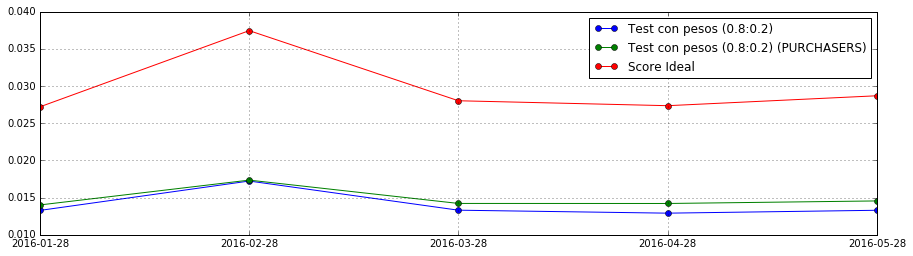

In [31]:
weight_v2 = pd.read_csv('scripts/results/first_try/WEIGHT_08_02_RF_ORIGINAL.csv')
score_weight_v2 = weight_v2.loc[:, 'score'].values

plt.figure(figsize=(15, 4))
plt.plot(score_weight_v2, '-o', score_weight_v2_purch, '-o', ideal_scores, '-o')
plt.xticks(range(len(dates)), dates)
plt.legend(['Test con pesos (0.8:0.2)', 'Test con pesos (0.8:0.2) (PURCHASERS)', 'Score Ideal'], loc=0)
plt.grid()

In [32]:
for i, score in enumerate(score_weight_v2):
    ideal = ideal_scores[i]
    date = dates[i]
    print("{:.5f} score para el mes {} que representa un {:.3f}% del score ideal".format(score, date, score*100/ideal))

0.01328 score para el mes 2016-01-28 que representa un 48.817% del score ideal
0.01723 score para el mes 2016-02-28 que representa un 46.010% del score ideal
0.01331 score para el mes 2016-03-28 que representa un 47.499% del score ideal
0.01291 score para el mes 2016-04-28 que representa un 47.191% del score ideal
0.01330 score para el mes 2016-05-28 que representa un 46.349% del score ideal


In [33]:
for i, score in enumerate(score_weight_v2_purch):
    ideal = ideal_scores[i]
    date = dates[i]
    print("{:.5f} score para el mes {} que representa un {:.3f}% del score ideal".format(score, date, score*100/ideal))

0.01401 score para el mes 2016-01-28 que representa un 51.517% del score ideal
0.01735 score para el mes 2016-02-28 que representa un 46.337% del score ideal
0.01421 score para el mes 2016-03-28 que representa un 50.736% del score ideal
0.01421 score para el mes 2016-04-28 que representa un 51.945% del score ideal
0.01455 score para el mes 2016-05-28 que representa un 50.726% del score ideal


### 4. Entrenamiento con los meses anteriores
La configuración de este experimento es:
* **DATASET:** Completo
* **TRAIN:** Todos los meses anteriores al mes de entrenamiento
* **ALGORITMO:** RandomForest

In [34]:
completed_purch = pd.read_csv('scripts/results/COMPLETE_RF_PURCHASERS.csv')
score_completed_purch = completed_purch.loc[:, 'score']

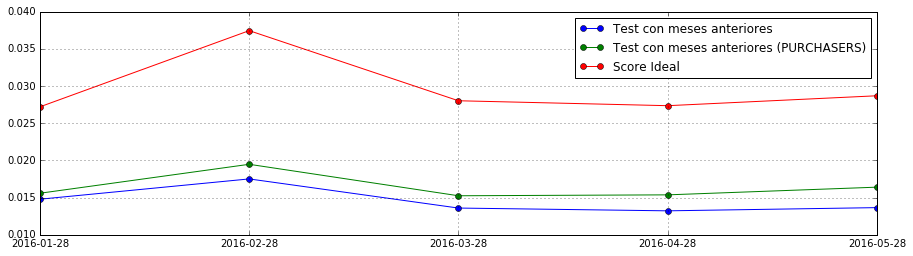

In [35]:
completed = pd.read_csv('scripts/results/first_try/COMPLETE_RF_ALL.csv')

score_completed = completed.loc[:, 'score'].values

plt.figure(figsize=(15, 4))
plt.plot(score_completed, '-o', score_completed_purch, '-o', ideal_scores, 'r-o')
plt.xticks(range(len(dates)), dates)
plt.legend(['Test con meses anteriores', 'Test con meses anteriores (PURCHASERS)', 'Score Ideal'], loc=0)
plt.grid()

In [36]:
for i, score in enumerate(score_completed):
    ideal = ideal_scores[i]
    date = dates[i]
    print("{:.5f} score para el mes {} que representa un {:.3f}% del score ideal".format(score, date, score*100/ideal))

0.01478 score para el mes 2016-01-28 que representa un 54.353% del score ideal
0.01751 score para el mes 2016-02-28 que representa un 46.767% del score ideal
0.01359 score para el mes 2016-03-28 que representa un 48.523% del score ideal
0.01322 score para el mes 2016-04-28 que representa un 48.335% del score ideal
0.01365 score para el mes 2016-05-28 que representa un 47.592% del score ideal


In [37]:
for i, score in enumerate(score_completed_purch):
    ideal = ideal_scores[i]
    date = dates[i]
    print("{:.5f} score para el mes {} que representa un {:.3f}% del score ideal".format(score, date, score*100/ideal))

0.01559 score para el mes 2016-01-28 que representa un 57.302% del score ideal
0.01948 score para el mes 2016-02-28 que representa un 52.017% del score ideal
0.01525 score para el mes 2016-03-28 que representa un 54.423% del score ideal
0.01537 score para el mes 2016-04-28 que representa un 56.186% del score ideal
0.01640 score para el mes 2016-05-28 que representa un 57.178% del score ideal


### Todos los experimentos

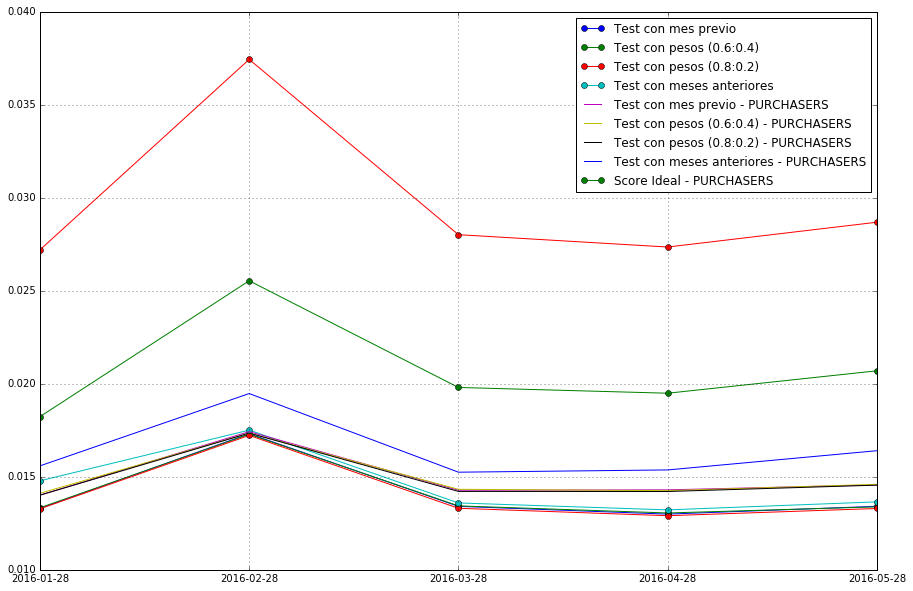

In [45]:
plt.figure(figsize=(15, 10))
plt.plot(score_prev_month, '-o', score_weight_v1, '-o', score_weight_v2, '-o' ,score_completed, '-o',
         score_prev_month_purch, '-', score_weight_v1_purch, '-', score_weight_v2_purch, '-' ,score_completed_purch, '-',
         score_exp9, '-o', ideal_scores, '-o')
plt.xticks(range(len(dates)), dates)
plt.legend(['Test con mes previo',
            'Test con pesos (0.6:0.4)',
            'Test con pesos (0.8:0.2)',
            'Test con meses anteriores',
            'Test con mes previo - PURCHASERS',
            'Test con pesos (0.6:0.4) - PURCHASERS',
            'Test con pesos (0.8:0.2) - PURCHASERS',
            'Test con meses anteriores - PURCHASERS',
            'Score Ideal - PURCHASERS'], loc=0)
plt.grid()

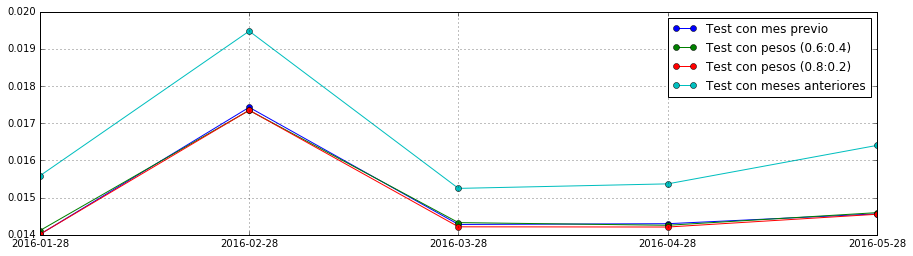

In [39]:
plt.figure(figsize=(15, 4))
plt.plot(score_prev_month_purch, '-o', score_weight_v1_purch, '-o', score_weight_v2_purch, '-o' ,score_completed_purch, '-o')
plt.xticks(range(len(dates)), dates)
plt.legend(['Test con mes previo',
            'Test con pesos (0.6:0.4)',
            'Test con pesos (0.8:0.2)',
            'Test con meses anteriores',
            'Score Ideal'], loc=0)
plt.grid()

### Último experimento

In [46]:
exp9 = pd.read_csv('scripts/results/PREV_PRODS_RF_PURCHASERS_FIRST.csv')
exp9_v2 = pd.read_csv('scripts/results/PREV_PRODS_RF_PURCHASERS.csv')

In [47]:
score_exp9 = exp9.loc[:, 'score'].values
score_exp9_v2 = exp9_v2.loc[:, 'score'].values

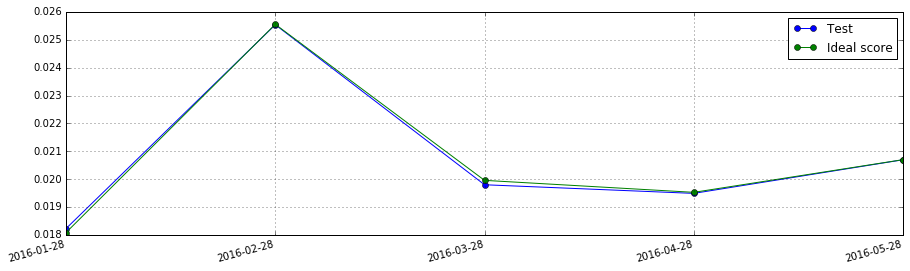

In [50]:
plt.figure(figsize=(15, 4))
plt.plot(score_exp9, '-o', score_exp9_v2, '-o')
plt.xticks(range(len(dates)), dates, rotation=15, ha='right')
plt.legend(['Test', 'Ideal score'])
plt.grid()

In [43]:
for i, score in enumerate(score_exp9):
    ideal = ideal_scores[i]
    date = dates[i]
    print("{:.5f} score para el mes {} que representa un {:.3f}% del score ideal".format(score, date, score*100/ideal))

0.01823 score para el mes 2016-01-28 que representa un 67.032% del score ideal
0.02554 score para el mes 2016-02-28 que representa un 68.211% del score ideal
0.01980 score para el mes 2016-03-28 que representa un 70.683% del score ideal
0.01949 score para el mes 2016-04-28 que representa un 71.266% del score ideal
0.02070 score para el mes 2016-05-28 que representa un 72.152% del score ideal


In [49]:
for i, score in enumerate(score_exp9_v2):
    ideal = ideal_scores[i]
    date = dates[i]
    print("{:.5f} score para el mes {} que representa un {:.3f}% del score ideal".format(score, date, score*100/ideal))

0.01809 score para el mes 2016-01-28 que representa un 66.504% del score ideal
0.02555 score para el mes 2016-02-28 que representa un 68.251% del score ideal
0.01996 score para el mes 2016-03-28 que representa un 71.246% del score ideal
0.01953 score para el mes 2016-04-28 que representa un 71.403% del score ideal
0.02070 score para el mes 2016-05-28 que representa un 72.166% del score ideal
